#  Telco Customer Churn Analysis — End-to-End Case Study

##  Project Objective

This project analyzes customer churn for a telecommunications company.

**Churn Definition**
A customer is considered churned if:

- `Churn = "Yes"` → Customer has left the company
- `Churn = "No"` → Customer is still active

Churn is a critical metric because:

- Retaining customers costs less than acquiring new ones
- Churn reduces recurring revenue & lifetime value
- High churn signals dissatisfaction & competition pressure


##  Project Goals

This project aims to:

1. Understand churn behaviour and key drivers
2. Compare churn vs non-churn customer groups
3. Engineer behavioural & lifecycle features
4. Train churn prediction models
5. Evaluate model performance
6. Provide actionable business recommendations


##  Dataset Description

Each row represents a customer record.

Key attributes include:

- Demographics  
- Account information  
- Subscription plans  
- Billing details  
- Service usage  
- Churn outcome

The dataset is ideal for an **end-to-end churn analytics case study**.

### Data Cleaning & Preparation

**Import Libraries & Load Data**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn 2 - WA_Fn-UseC_-Telco-Customer-Churn 2.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Structure & Summary**

Inspect column types, shape, and completeness.

In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


((7043, 21), None)

**To check for missing values and ensure data consistency.**

In [5]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Numeric churn flag**

In [9]:
df['Churn_flag'] = (df['Churn'] == 'Yes').astype(int)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

###  Churn Distribution
To compute the churn ratio to understand the dataset balance.

C:\Users\mildr\AppData\Local\Temp\ipykernel_6848\1081618862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")


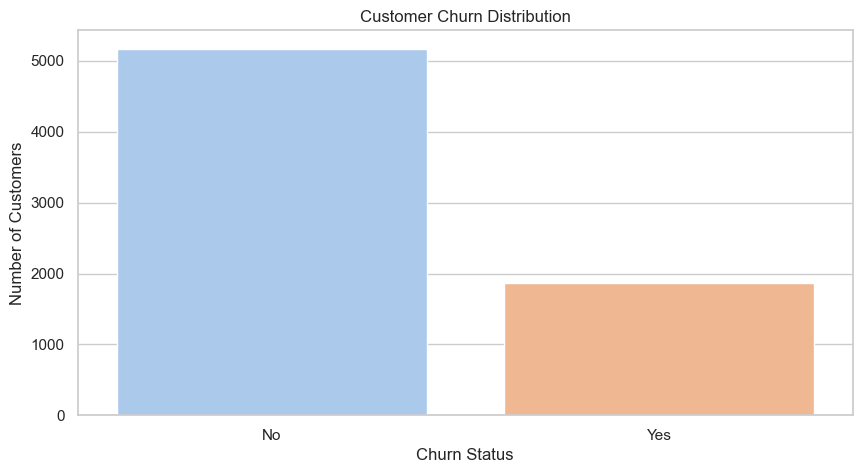

In [13]:
churn_counts = df['Churn'].value_counts()

sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")
plt.title("Customer Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn Status")
plt.show()

##  Exploratory Data Analysis (EDA)

Goal:
- Compare churn vs non-churn groups
- Identify high-risk churn segments
- Support feature engineering & modeling

### Churn vs Contract Type

C:\Users\mildr\AppData\Local\Temp\ipykernel_6848\1435280597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


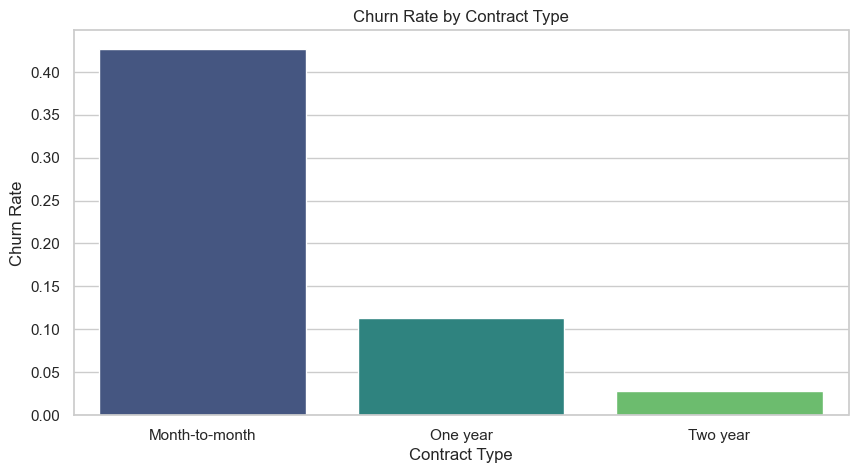

In [15]:
contract_churn = (
    df.groupby('Contract')['Churn_flag'].mean().reset_index()
)

sns.barplot(
    data=contract_churn,
    x='Contract',
    y='Churn_flag',
    palette="viridis"
)

plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()

Short-term contracts = **highest churn risk**

### Churn vs Tenure Groups

C:\Users\mildr\AppData\Local\Temp\ipykernel_6848\1005993199.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['Churn_flag'].mean().reset_index()
C:\Users\mildr\AppData\Local\Temp\ipykernel_6848\1005993199.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


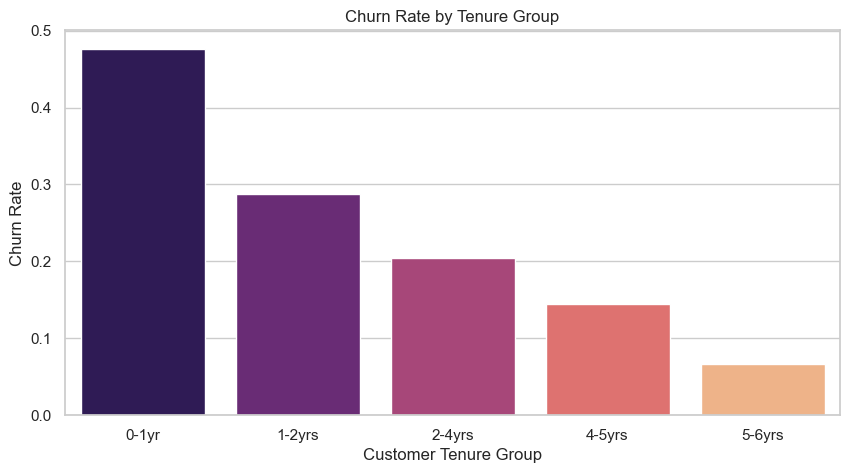

In [17]:
bins = [0,12,24,48,60,72]
labels = ['0-1yr','1-2yrs','2-4yrs','4-5yrs','5-6yrs']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

tenure_churn = (
    df.groupby('tenure_group')['Churn_flag'].mean().reset_index()
)

sns.barplot(
    data=tenure_churn,
    x='tenure_group',
    y='Churn_flag',
    palette="magma"
)

plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Tenure Group")
plt.show()

Retention is most critical during first 12 months

### Churn vs Internet Service

C:\Users\mildr\AppData\Local\Temp\ipykernel_6848\1479068448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


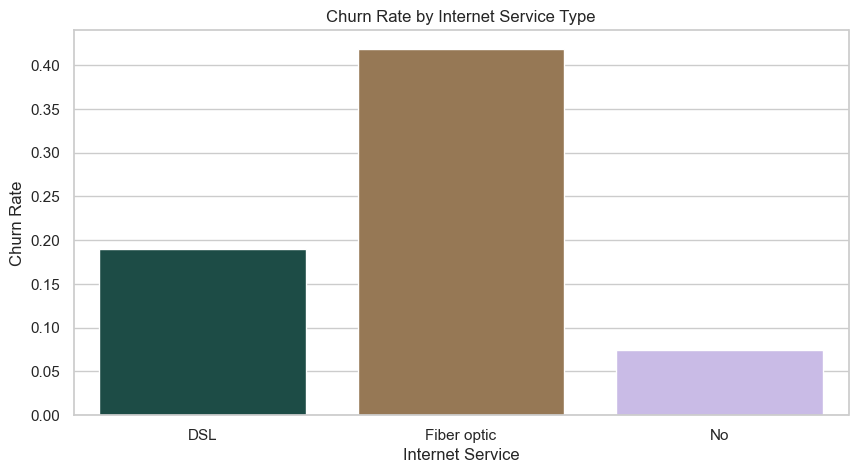

In [19]:
internet_churn = (
    df.groupby('InternetService')['Churn_flag'].mean().reset_index()
)

sns.barplot(
    data=internet_churn,
    x='InternetService',
    y='Churn_flag',
    palette="cubehelix"
)

plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Churn Rate")
plt.xlabel("Internet Service")
plt.show()

Fiber users may be:

. more price-sensitive

. higher performance expectations

### Churn vs Payment Method

C:\Users\mildr\AppData\Local\Temp\ipykernel_6848\413570720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


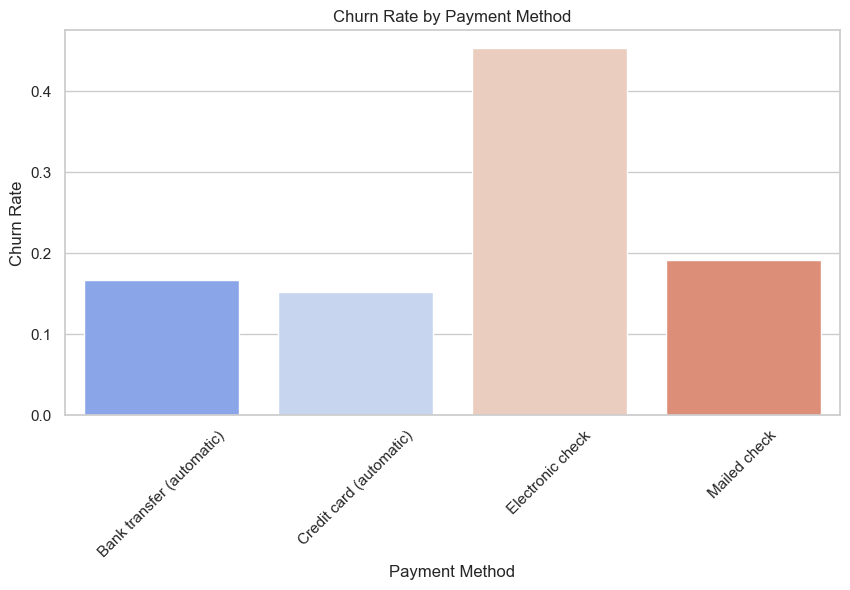

In [21]:
payment_churn = (
    df.groupby('PaymentMethod')['Churn_flag'].mean().reset_index()
)

sns.barplot(
    data=payment_churn,
    x='PaymentMethod',
    y='Churn_flag',
    palette="coolwarm"
)

plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()

Auto-pay customers show higher retention stability

##  Feature Engineering

To create behavioural and lifecycle features.

**Number of subscribed services**

In [23]:
service_cols = [
    'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

df['num_services'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

**Tenure lifecycle bins**

In [25]:
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

**Final feature matrix**

In [27]:
X = df.drop(columns=['customerID','Churn','Churn_flag'])
y = df['Churn_flag']

## Train-Test Split & Preprocessing

**Model Training Pipeline**

Includes preprocessing + encoding + scaling.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

**Logic Regression Model**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

y_pred_lr = log_model.predict(X_test)
y_prob_lr = log_model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

[[926 109]
 [165 209]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8422666563331527


**Random Forest Model**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

[[856 179]
 [133 241]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.57      0.64      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

ROC-AUC: 0.8366374744891368


**Feature Importance (Random Forest)**

In [35]:
ohe = rf_model.named_steps['prep'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(cat_cols)

feature_names = list(cat_features) + num_cols

importances = rf_model.named_steps['clf'].feature_importances_

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
fi.head(15)

tenure                            0.175337
TotalCharges                      0.152870
MonthlyCharges                    0.119737
Contract_Two year                 0.072586
InternetService_Fiber optic       0.060801
PaymentMethod_Electronic check    0.040468
num_services                      0.033757
Contract_One year                 0.033624
OnlineSecurity_Yes                0.028361
TechSupport_Yes                   0.022761
PaperlessBilling_Yes              0.021337
gender_Male                       0.019548
OnlineBackup_Yes                  0.017432
Partner_Yes                       0.016767
Dependents_Yes                    0.015592
dtype: float64

## Post-Dictive Churn Analysis
We compare actual vs predicted churn at the segment level.

In [37]:
test_df = X_test.copy()
test_df['actual'] = y_test.values
test_df['pred'] = y_pred_rf
test_df['prob'] = y_prob_rf

test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,num_services,actual,pred,prob
437,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,...,Two year,Yes,Credit card (automatic),114.05,8468.20,5-6yrs,8,0,0,0.010978
2280,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Credit card (automatic),100.15,908.55,0-1yr,5,0,1,0.850672
2235,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,...,One year,Yes,Credit card (automatic),78.35,3211.20,2-4yrs,6,0,0,0.132907
4460,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,...,Month-to-month,No,Electronic check,78.20,1468.75,1-2yrs,3,0,0,0.402107
3761,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,...,Two year,Yes,Credit card (automatic),82.65,5919.35,5-6yrs,7,0,0,0.019593


**Identify high-risk segment**

In [39]:
segment = test_df[
    (test_df['Contract'] == 'Month-to-month') &
    (test_df['InternetService'] == 'Fiber optic') &
    (test_df['tenure'] <= 12)
]

segment[['actual','pred']].mean()

actual    0.661290
pred      0.978495
dtype: float64

#  Business Recommendations

###  High-Risk Churn Segments
- Month-to-month customers
- Tenure below 12 months
- Fiber-optic users
- Electronic-check payment users


##  Recommended Retention Actions

### 1. Convert monthly contracts → 1-year plans
- loyalty rewards
- contract upgrade discounts

### 2. First-year onboarding program
- welcome support calls
- quarterly check-ins
- service education touchpoints

### 3. Fiber-customer experience improvement
- performance investigation
- premium support tier
- bundled feature offers

### 4. Move customers to auto-payment
- incentive for bank transfer/card autopay

### 5. Promote value-added services
Customers with:
- TechSupport
- OnlineSecurity

show **lower churn probability**


##  Final Conclusion

The analysis shows that churn is driven by:

- contract flexibility
- early-lifecycle risk
- billing method
- internet plan type
- service value perception

The Random Forest model provides:

- strong recall for churners
- reliable churn risk segmentation

This supports **data-driven retention strategy design**.